## ch-KERNEL -LOGISTIC REGression

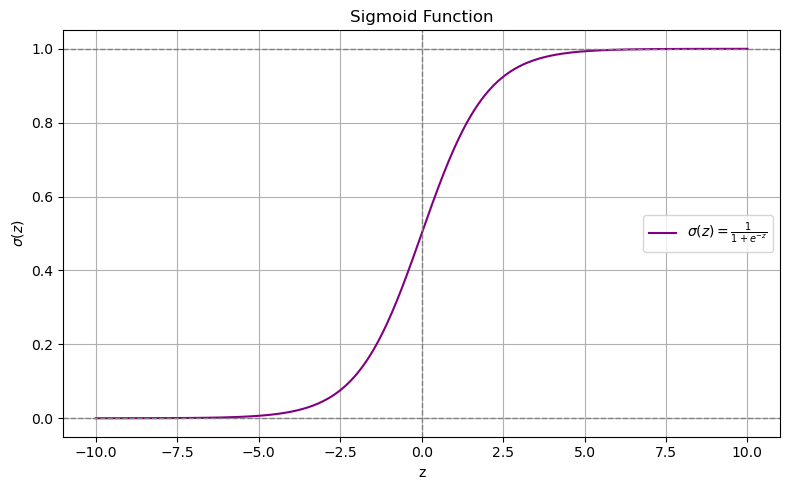

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values
z = np.linspace(-10, 10, 400)
sig = sigmoid(z)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(z, sig, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='purple')
plt.axhline(0, color='gray', lw=1, linestyle='--')
plt.axhline(1, color='gray', lw=1, linestyle='--')
plt.axvline(0, color='gray', lw=1, linestyle='--')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### logistic Regeression

In [2]:
import numpy as np

def logistic_regression_newton(X, y, max_iter=100, eps=1e-6):
    """
    Logistic Regression using Newton-Raphson optimization.
    y must be in {-1, 1}
    """
    # Add bias term to feature matrix
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    beta = np.zeros(X.shape[1])

    for it in range(max_iter):
        Xb = X @ beta
        v = np.exp(-y * Xb)
        u = y * v / (1 + v)

        grad = -X.T @ u
        w_diag = v / (1 + v)**2
        W = np.diag(w_diag)
        H = X.T @ W @ X

        delta = np.linalg.solve(H, grad)
        beta -= delta

        if np.linalg.norm(delta) < eps:
            print(f'Converged in {it+1} iterations.')
            break

    return beta

def predict(X, beta):
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    return np.where(X @ beta >= 0, 1, -1)


## KLR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA

# Load and preprocess dataset
data = load_breast_cancer()
X, y = data.data, data.target
y = 2 * y - 1  # Convert to {-1, 1}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# RBF Kernel function
def rbf_kernel(X1, X2, gamma=1.0):
    sq_dists = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * sq_dists)

# Kernel Logistic Regression (Dual formulation)
class KernelLogisticRegression:
    def __init__(self, gamma=1.0, lambda_=1e-3):
        self.gamma = gamma
        self.lambda_ = lambda_

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.K = rbf_kernel(X, X, self.gamma)

        def loss(alpha):
            z = self.K @ alpha
            log_exp = np.log(1 + np.exp(-y * z))
            reg = 0.5 * self.lambda_ * np.dot(alpha, self.K @ alpha)
            return np.mean(log_exp) + reg

        def grad(alpha):
            z = self.K @ alpha
            sigmoid = 1 / (1 + np.exp(y * z))
            grad = -(self.K @ (y * sigmoid)) / len(y) + self.lambda_ * self.K @ alpha
            return grad

        alpha_init = np.zeros(len(y))
        result = minimize(loss, alpha_init, jac=grad, method='L-BFGS-B')
        self.alpha = result.x

    def predict_proba(self, X):
        K_test = rbf_kernel(X, self.X_train, self.gamma)
        z = K_test @ self.alpha
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        return np.where(self.predict_proba(X) >= 0.5, 1, -1)

# Train Kernel Logistic Regression
klr = KernelLogisticRegression(gamma=0.5)
klr.fit(X_train, y_train)
y_pred = klr.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix((y_test + 1) // 2, (y_pred + 1) // 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# Visualization of classification regions
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = klr.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 5))

# Classification plot
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title(f'Kernel Logistic Regression Classification (Accuracy: {acc:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Confusion matrix
plt.subplot(1, 2, 2)
disp.plot(ax=plt.gca())
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


### Logistic Regersssion result

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess dataset
data = load_breast_cancer()
X, y = data.data, data.target
y = 2 * y - 1  # Convert to {-1, 1}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Add bias term
X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Initialize beta
beta = np.zeros(X_train_aug.shape[1])

# Newton-Raphson method for logistic regression
max_iter = 20
eps = 1e-6

for it in range(max_iter):
    Xb = X_train_aug @ beta
    v = np.exp(-y_train * Xb)
    u = y_train * v / (1 + v)

    grad = -X_train_aug.T @ u
    w_diag = v / (1 + v)**2
    W = np.diag(w_diag)
    H = X_train_aug.T @ W @ X_train_aug

    delta = np.linalg.solve(H, grad)
    beta -= delta

    if np.linalg.norm(delta) < eps:
        print(f'Converged in {it+1} iterations.')
        break

# Predict on test data
Xb_test = X_test_aug @ beta
y_pred = np.where(Xb_test >= 0, 1, -1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid_aug = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = grid_aug @ beta
Z = Z.reshape(xx.shape)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Decision boundary
ax[0].contourf(xx, yy, Z >= 0, alpha=0.4, cmap=plt.cm.coolwarm)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
ax[0].set_title("Logistic Regression Decision Boundary")

# Confusion matrix
ConfusionMatrixDisplay(cm, display_labels=["Malignant", "Benign"]).plot(ax=ax[1])
ax[1].set_title("Confusion Matrix")

plt.tight_layout()
plt.show()

accuracy


### camparisoon on two circle data of Logistic regression and Kernel Logistic Regression

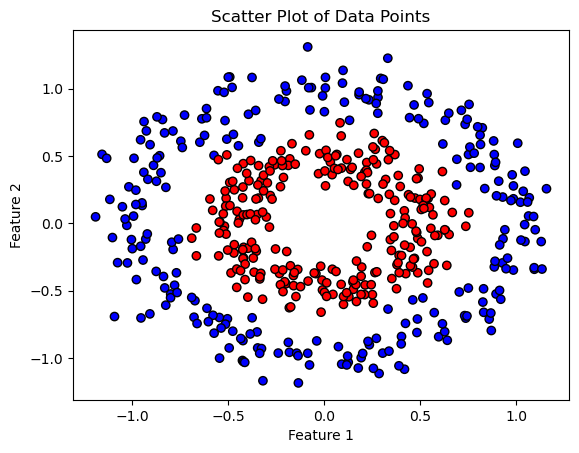

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

# Create scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Scatter Plot of Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


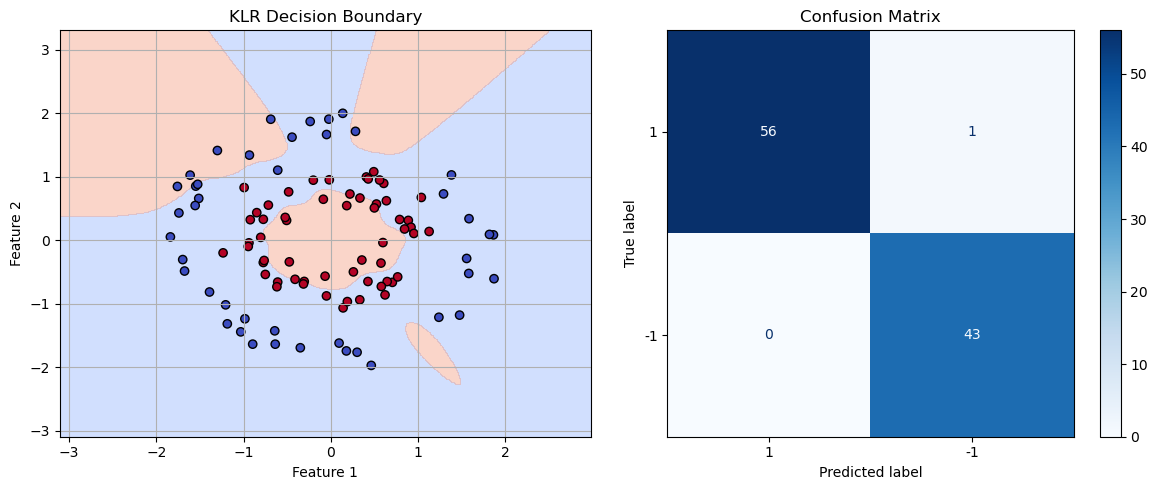

Accuracy: 0.99


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics.pairwise import rbf_kernel

# Step 1: Generate nonlinear data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)
y = 2 * y - 1  # Convert labels to {-1, 1}

# Step 2: Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define Kernel Logistic Regression using Newton's method
def kernel_logistic_regression(X_train, y_train, X_test, gamma=5.0, max_iter=100, eps=1e-5):
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    alpha = np.zeros(len(y_train))
    
    for _ in range(max_iter):
        f = K @ alpha
        v = np.exp(-y_train * f)
        u = y_train * v / (1 + v)
        W = np.diag(v / (1 + v)**2)
        grad = -K @ u
        H = K @ W @ K + 1e-6 * np.eye(len(K))  # Regularization for numerical stability
        delta = np.linalg.solve(H, grad)
        alpha -= delta
        if np.linalg.norm(delta) < eps:
            break
    
    # Predict on test data
    K_test = rbf_kernel(X_test, X_train, gamma=gamma)
    f_test = K_test @ alpha
    y_pred = np.where(f_test >= 0, 1, -1)
    
    return y_pred, alpha

# Step 4: Apply KLR
y_pred_klr, alpha = kernel_logistic_regression(X_train_scaled, y_train, X_test_scaled)

# Step 5: Evaluate the model
acc = accuracy_score(y_test, y_pred_klr)
cm = confusion_matrix(y_test, y_pred_klr, labels=[1, -1])

# Step 6: Visualization
def plot_decision_boundary_and_confusion_matrix(X_train, X_test, y_train, y_test, alpha, gamma, cm):
    # Create a mesh grid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    K_grid = rbf_kernel(grid_scaled, X_train_scaled, gamma=gamma)
    Z = K_grid @ alpha
    Z = Z.reshape(xx.shape)

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot decision boundary
    ax[0].contourf(xx, yy, Z > 0, alpha=0.4, cmap=plt.cm.coolwarm)
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    ax[0].set_title("KLR Decision Boundary")
    ax[0].set_xlabel("Feature 1")
    ax[0].set_ylabel("Feature 2")
    ax[0].grid(True)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, -1])
    disp.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion Matrix")

    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_decision_boundary_and_confusion_matrix(X_train_scaled, X_test_scaled, y_train, y_test, alpha, gamma=5.0, cm=cm)

# Print accuracy
print(f"Accuracy: {acc:.2f}")


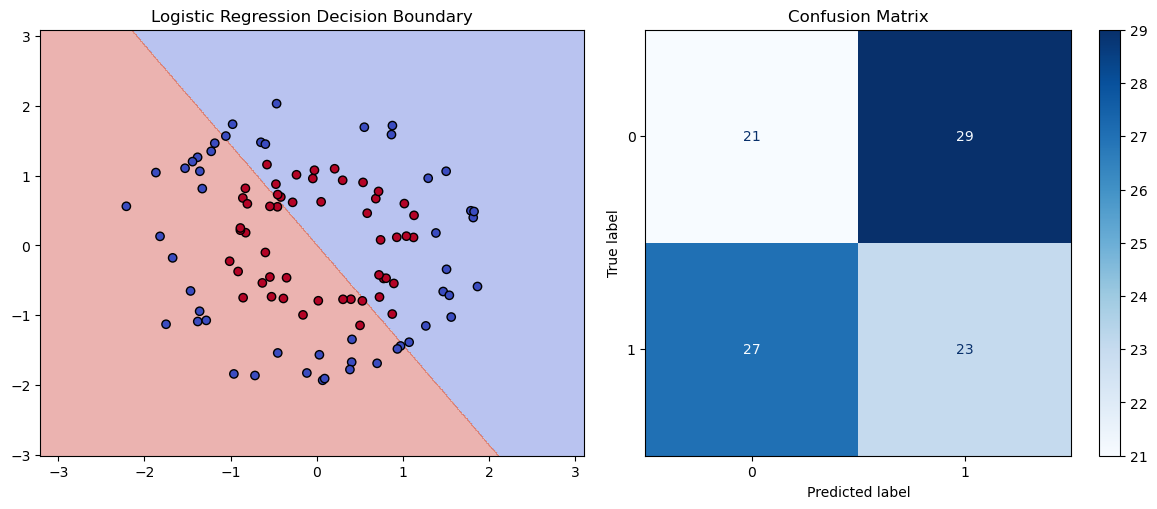

The accuracy for Logistic regression is 0.44


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate synthetic dataset
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_test = lr_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
acc = accuracy_score(y_test, y_pred_test)
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = lr_model.predict(grid)
Z = Z.reshape(xx.shape)

ax[0].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
ax[0].set_title("Logistic Regression Decision Boundary")

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title("Confusion Matrix")

plt.tight_layout()
plt.show()
print(f"The accuracy for Logistic regression is {acc}")